# Quality Control

## `controls_report` (a color-coded spreadsheet of control probe performance per sample)

```methylcheck``` is geared toward quality control of processed data. To this end, there is a helpful function that summarizes performance of control probes ([details on control probes here](https://support.illumina.com/content/dam/illumina-support/documents/documentation/chemistry_documentation/infinium_assays/infinium_hd_methylation/beadarray-controls-reporter-user-guide-1000000004009-00.pdf)). To run this function, the control_probes.pkl file output from ```methylprep``` is required. This report ensures that the chemistry (bisulfite conversion, target specificity, hybridization, staining, etc.) and machine readings are acceptable.

There is an optional portion of this report that relies on values from the poobah file as well. If no poobah file is present, this part is ignored. 

Check the guide linked above for more information on how to read these reports. They're intuitively color-coded (green = passing, red = failing, yellow = somewhere in between) so they're easy to read at a glance. There is a colorblind-friendly option included in this function. 

We'll walk through examples of the QC pipeline using pre-processed, filtered data (see the Filtering Probes page).

In [1]:
import methylcheck
from pathlib import Path
filepath = Path('/Users/patriciagirardi/tutorial/GPL21145')

In [2]:
df, metadata = methylcheck.load_both(filepath=filepath)
metadata.head()

INFO:methylcheck.load_processed:Found several meta_data files; attempting to match each with its respective beta_values files in same folders.
INFO:methylcheck.load_processed:Multiple meta_data found. Only loading the first file.
INFO:methylcheck.load_processed:Loading 16 samples.
Files: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
INFO:methylcheck.load_processed:loaded data (865859, 16) from 1 pickled files (0.223s)
INFO:methylcheck.load_processed:meta.Sample_IDs match data.index (OK)


,GSM_ID,Sample_Name,Sentrix_ID,Sentrix_Position,source,histological diagnosis,description,Sample_ID
2,GSM4429898,Grade II rep3,203163220027,R01C01,Resected glioma,Diffuse astrocytoma (II),Glioma,203163220027_R01C01
3,GSM4429899,Grade III rep1,203163220027,R02C01,Resected glioma,Anaplastic astrocytoma (III),Glioma,203163220027_R02C01
12,GSM4429908,Grade IV rep5,203163220027,R03C01,Resected glioma,Glioblastoma (IV),Glioma,203163220027_R03C01
15,GSM4429911,Grade IV rep8,203163220027,R04C01,Resected glioma,Glioblastoma (IV),Glioma,203163220027_R04C01
6,GSM4429902,Grade II rep6,203163220027,R05C01,Resected glioma,Oligodendroglioma (II),Glioma,203163220027_R05C01


In [3]:
methylcheck.controls_report(filepath=filepath)

INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv


203175700025_R01C01 GA r=0.81 ±0.23 p<0.0 |CT r=0.82 ±0.15 p<0.0
203175700025_R02C01 GA r=0.9 ±0.16 p<0.0 |CT r=0.87 ±0.13 p<0.0
203163220027_R01C01 GA r=0.86 ±0.19 p<0.0 |CT r=0.83 ±0.14 p<0.0
203163220027_R02C01 GA r=0.88 ±0.16 p<0.0 |CT r=0.85 ±0.13 p<0.0
203175700025_R05C01 GA r=0.87 ±0.14 p<0.0 |CT r=0.84 ±0.11 p<0.0
203175700025_R06C01 GA r=0.91 ±0.12 p<0.0 |CT r=0.87 ±0.1 p<0.0
203163220027_R05C01 GA r=0.87 ±0.16 p<0.0 |CT r=0.85 ±0.12 p<0.0
203163220027_R06C01 GA r=0.9 ±0.14 p<0.0 |CT r=0.85 ±0.12 p<0.0
203175700025_R03C01 GA r=0.85 ±0.17 p<0.0 |CT r=0.85 ±0.13 p<0.0
203175700025_R04C01 GA r=0.87 ±0.15 p<0.0 |CT r=0.87 ±0.11 p<0.0
203175700025_R07C01 GA r=0.88 ±0.13 p<0.0 |CT r=0.85 ±0.11 p<0.0
203175700025_R08C01 GA r=0.9 ±0.13 p<0.0 |CT r=0.87 ±0.1 p<0.0
203163220027_R03C01 GA r=0.84 ±0.17 p<0.0 |CT r=0.83 ±0.13 p<0.0
203163220027_R07C01 GA r=0.85 ±0.16 p<0.0 |CT r=0.86 ±0.11 p<0.0
203163220027_R08C01 GA r=0.87 ±0.15 p<0.0 |CT r=0.85 ±0.12 p<0.0


INFO:methylcheck.reports.bead_array:Predicting Sex...
INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv


203163220027_R04C01 GA r=0.87 ±0.16 p<0.0 |CT r=0.87 ±0.12 p<0.0
(865859, 16) (865859, 16)


The color-coded results are contained in an excel file that will be saved in the same directory that was specified as an input. It will look similar to this: <br>
![Controls Report example](https://github.com/FoxoTech/methylcheck/blob/feature/v.0.7.5-docs/docs/bead_array_report.png?raw=true)
<br>
The "Passing Probes" column is the column that relies on values from the poobah file. This is a measure of how many probes failed in each sample (detection p-value > 0.05). The p-value cut off is adjustable with the ```pval_sig``` argument, which is set to 0.05 by default. 

Notice the final column ("Result") where most samples are passing. This column is calculated by checking that all of the QC columns are above a minimum threshold. This threshold is adjustable with the ```passing``` argument (set to 0.7 by default). 
- If the poobah file is included and 20% or more of probes fail, the Result is automatically FAIL.
- If 70% of the columns are passing, the result is "OK" or passing. 
- If more than 70% are passing, but less than 100%, the "OK" will have a number next to it to specify what percentage of columns passed. 
- If less than 70% of the columns passed, the result is either FAIL or MARGINAL (based on how close to the 70% threshold it got). 



The predicted sex column is based on the median values of methylation measurements on the X and Y chromosomes. If ```yMed - xMed``` is less than whatever the specified cutoff value is, it is predicted female. Otherwise, the predicted sex is male. Also, for samples from female subjects, at least 90% of the Y chromosome probes should fail. If there is a sample sheet that includes "sex" or "gender", the reporter will also flag any mismatches between the predicted sex and the specified sex (this does not affect the Result column). 


## Quality Control in the IDE

If you want to run a quick quality control check within your CLI or IDE (with no output files saved), use the `run_qc` function. This is a simplified version of the full `controls_report` function.

The first and second plots shown below are based on the `qc_signal_intensity` function, which suggests sample outliers based on methylated and unmethylated signal intensity. The cutoff value is based on `minfi`'s chosen cutoff value. If a sample falls below the dotted line in the second chart, it is potentially poor quality (due to low fluorescence). This is a very specific way of identifying poor quality samples and we recommend taking a more holistic approach (using `controls_report()`). However, this can still be useful information in some circumstances, which is why we've included it in the original qc pipeline. 

The next set of plots cover hybridization, staining, bisulfite conversion, specificity, target removal, extension, negative controls, and non-polymorphic binding, but can be more difficult to interpret in this graph format. For more, consult [Illumina's technical document](https://support.illumina.com/content/dam/illumina-support/documents/documentation/chemistry_documentation/infinium_assays/infinium_hd_methylation/beadarray-controls-reporter-user-guide-1000000004009-00.pdf) on what the expected values for these graphs should be.

The final set of plots is beta distributions by probe type (Type I and Type II); the distributions of Type I probes are split by color channel as well. 

This function is to be used before any removal of probes or samples. If you remove probes or samples from your beta value dataframe, this function will no longer run due to inconsitant rows and/or columns in other dataframes (such as m-value).

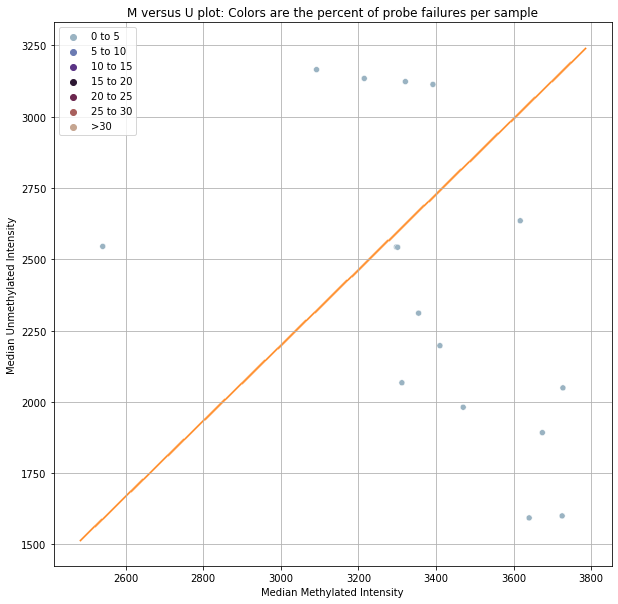

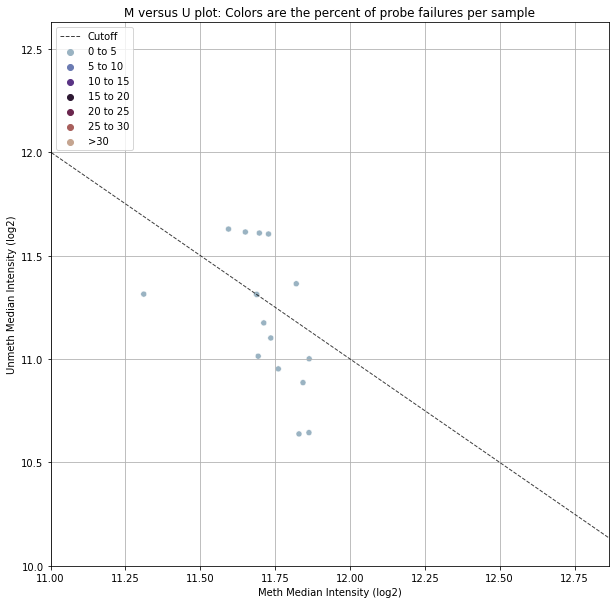

List of Bad Samples
['203163220027_R01C01', '203163220027_R03C01', '203163220027_R04C01', '203163220027_R05C01', '203163220027_R06C01', '203163220027_R08C01', '203175700025_R01C01', '203175700025_R02C01', '203175700025_R05C01', '203175700025_R06C01']


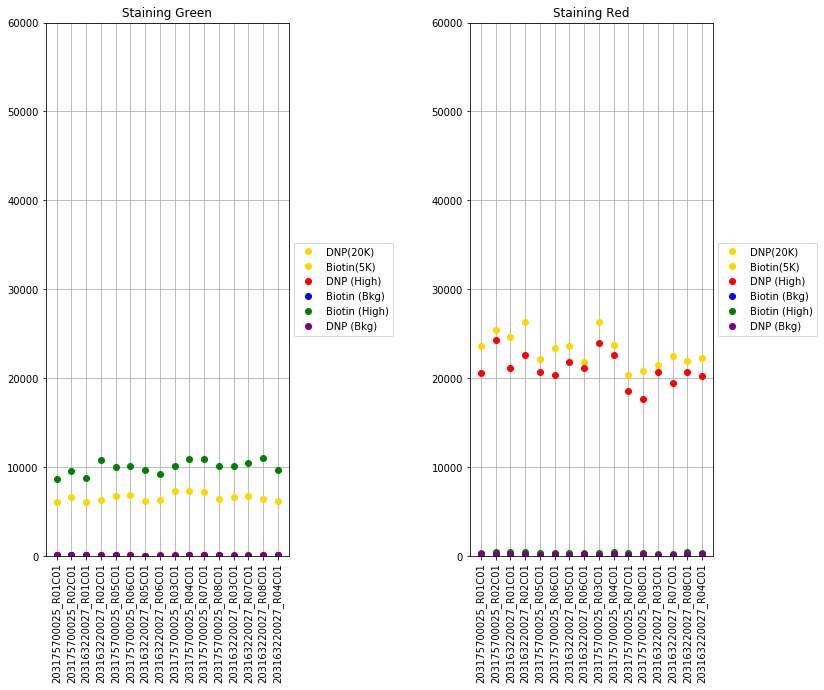

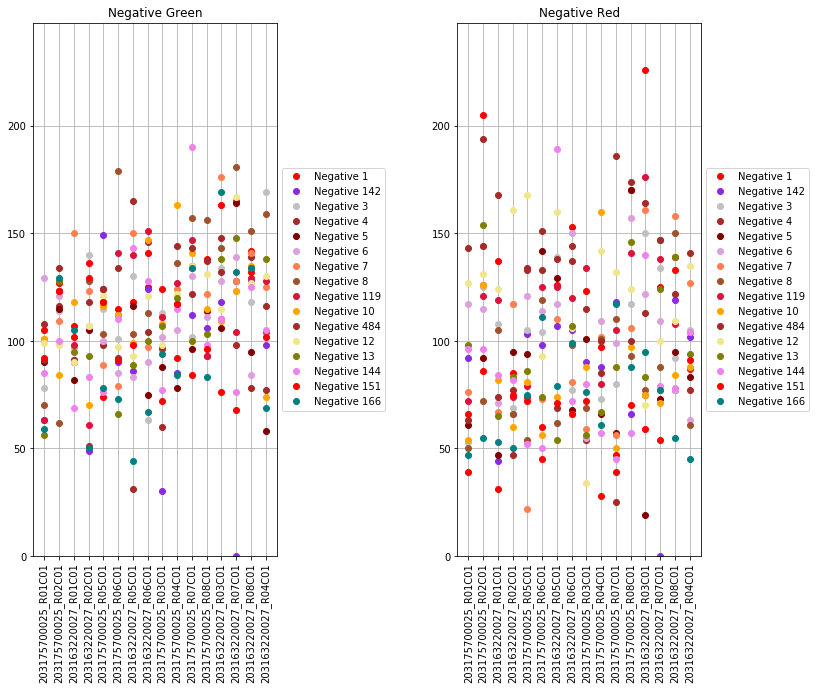

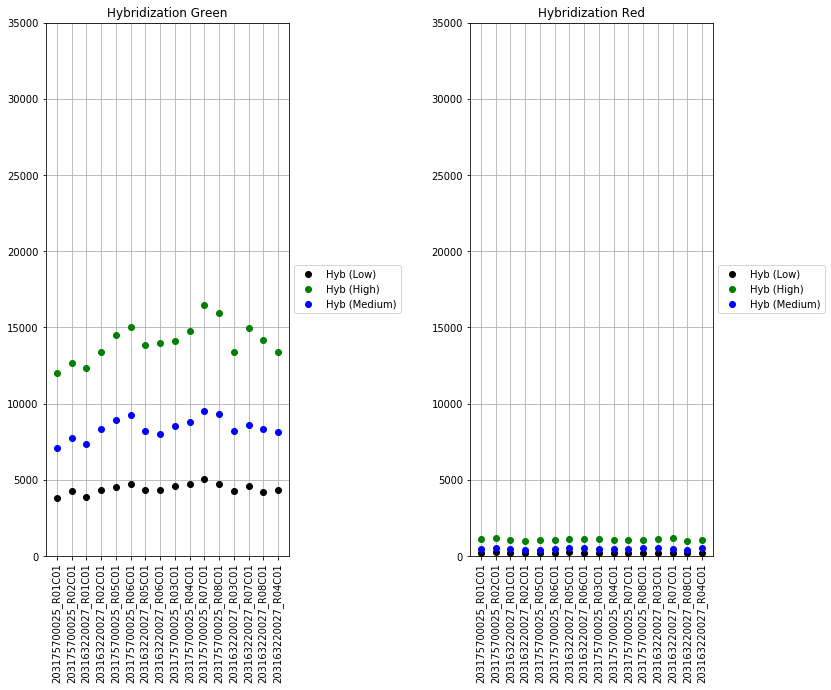

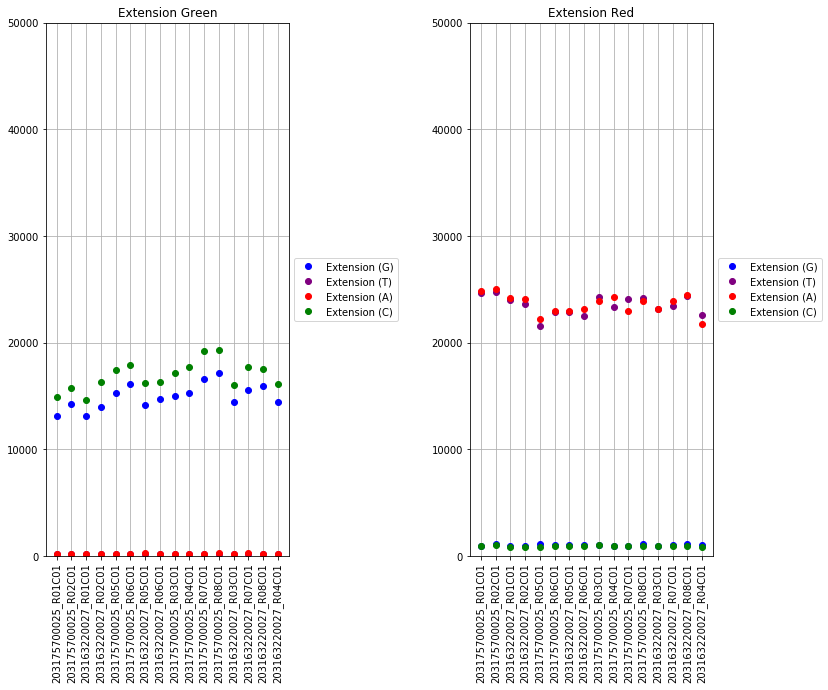

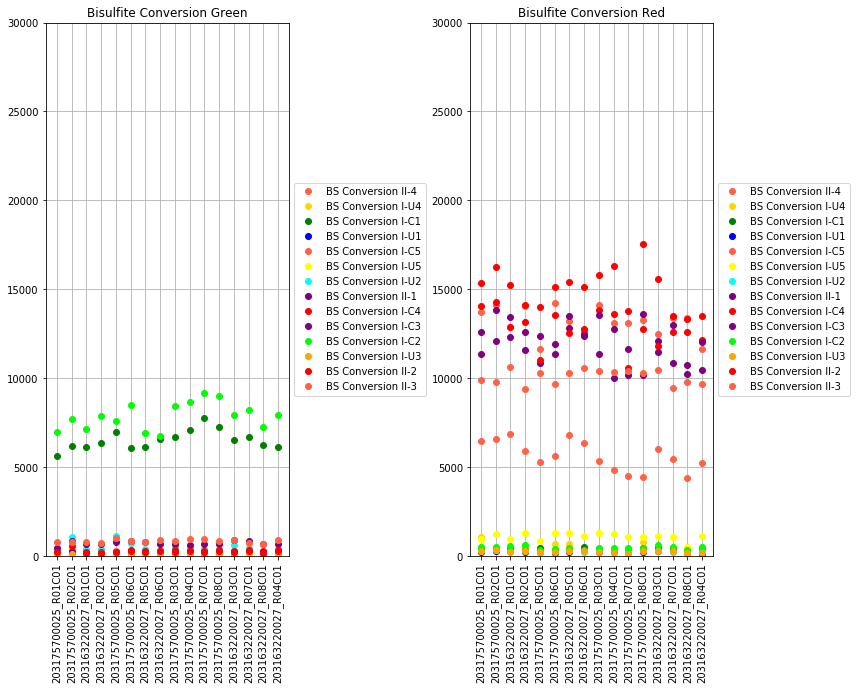

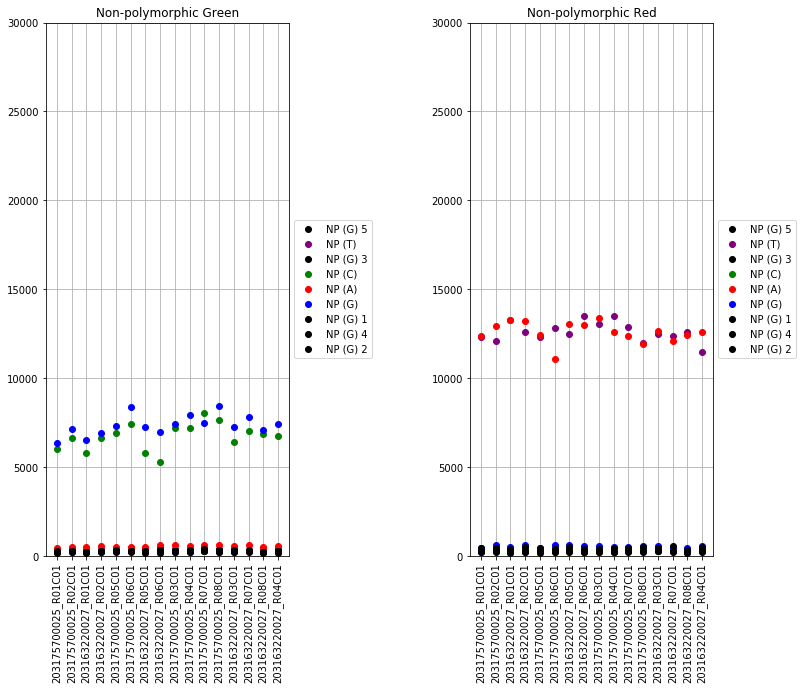

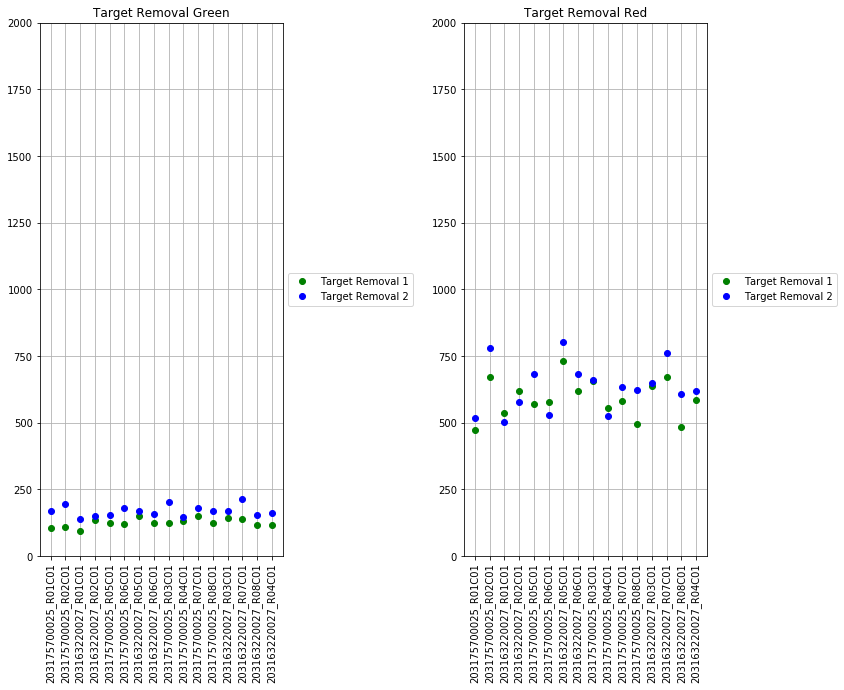

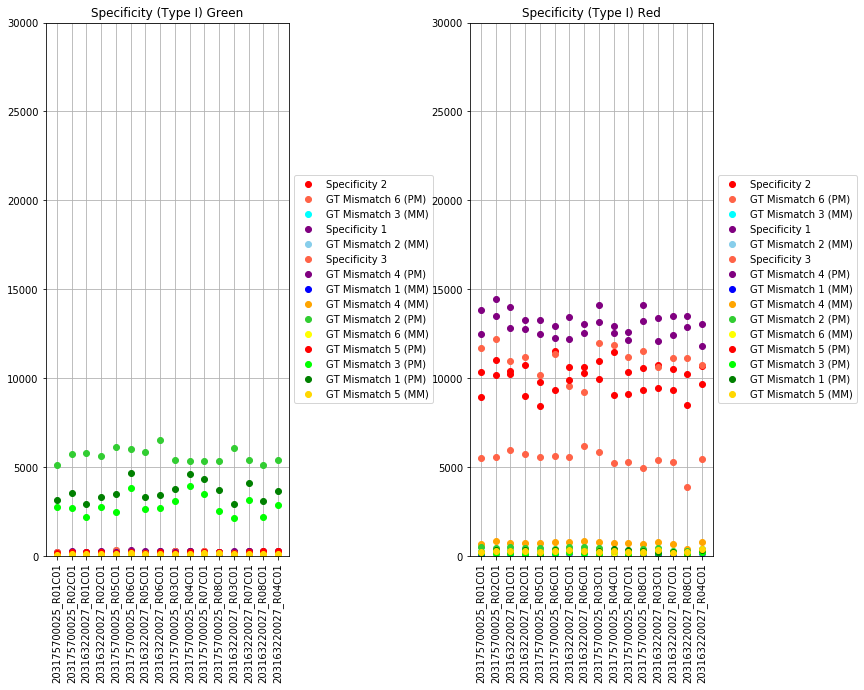

INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv


Found 142137 type I probes.


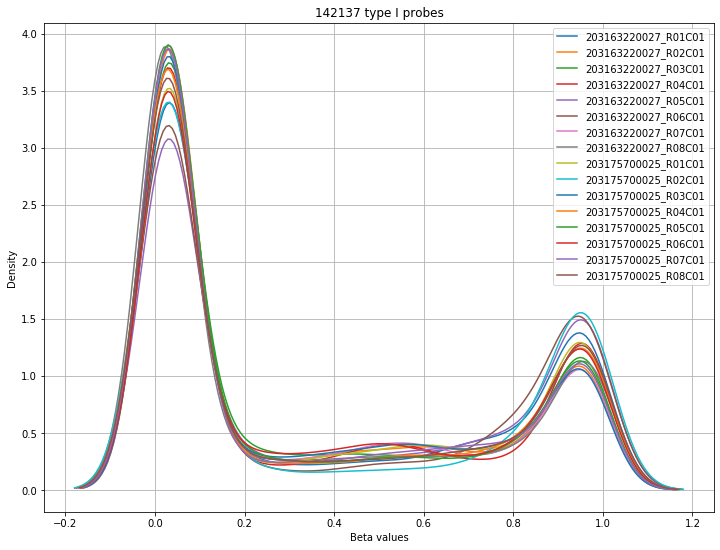

Found 723722 type II probes.


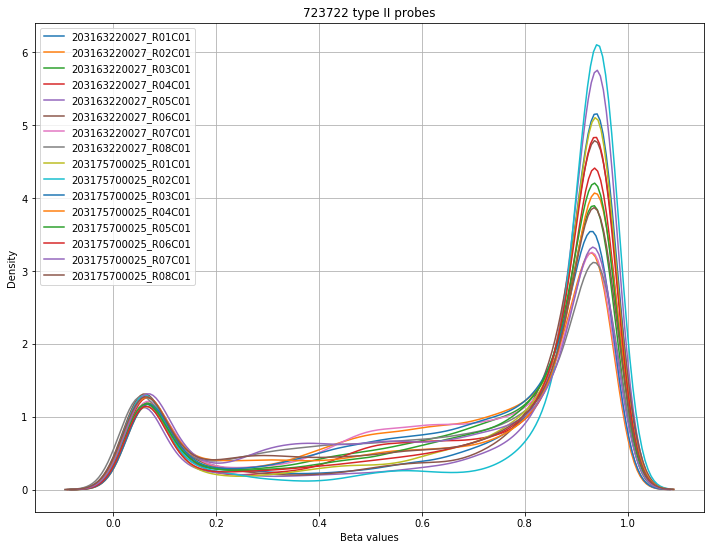

Found 92198 type I Red (IR) probes.


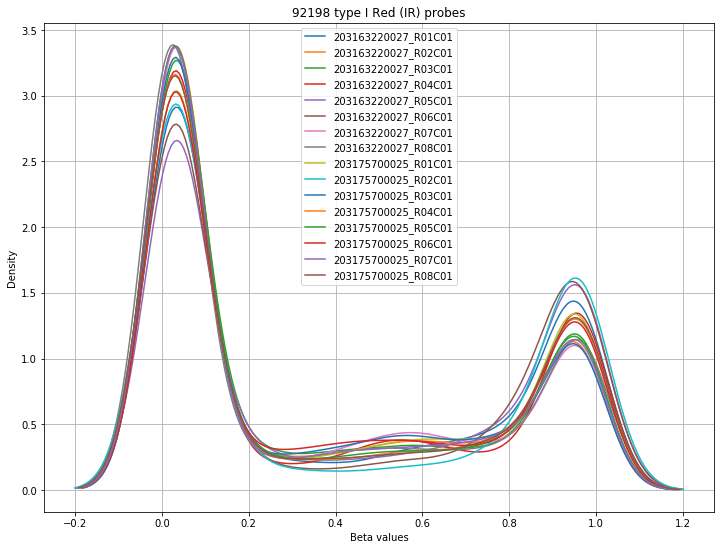

Found 49939 type I Green (IG) probes.


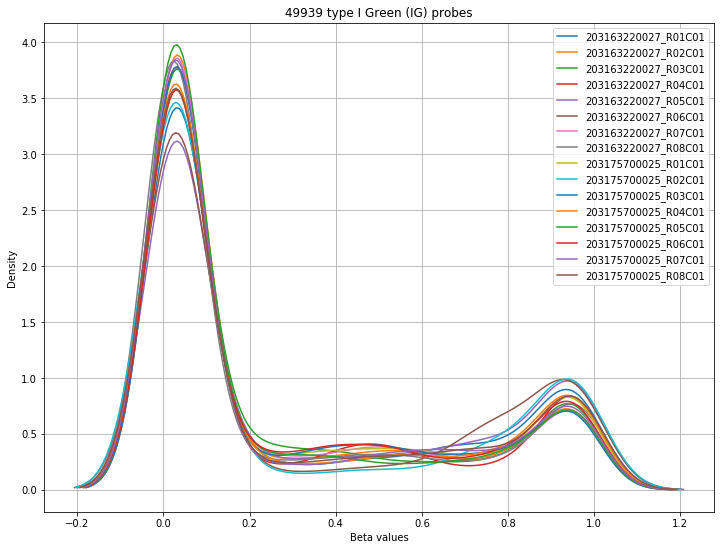

In [4]:
methylcheck.run_qc(filepath)

## Predicting Sex

If you want to predict the sex of your samples without generating the entire QC report, you need the methylated and unmethylated .pkl files generated by `methylprep` and the `get_sex` function. See below for an example of its usage.

100%|██████████| 16/16 [00:00<00:00, 1415.80it/s]
INFO:methylcheck.load_processed:(865859, 16) (865859, 16)
INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv


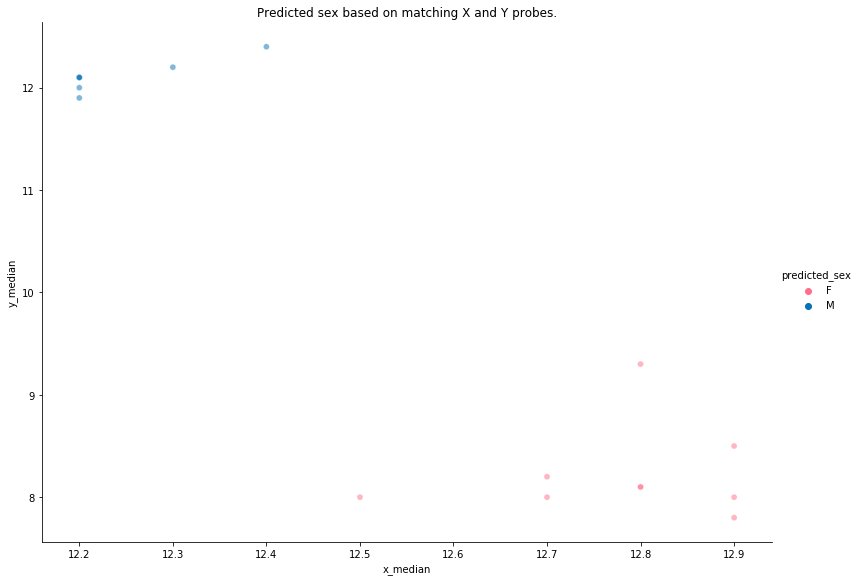

,x_median,y_median,predicted_sex
203163220027_R01C01,12.7,8.0,F
203163220027_R02C01,12.3,12.2,M
203163220027_R03C01,12.8,9.3,F
203163220027_R04C01,12.8,8.1,F
203163220027_R05C01,12.2,12.0,M
203163220027_R06C01,12.2,12.1,M
203163220027_R07C01,12.9,8.5,F
203163220027_R08C01,12.7,8.2,F
203175700025_R01C01,12.5,8.0,F
203175700025_R02C01,12.2,12.1,M


In [5]:
import methylcheck
from pathlib import Path
filepath = Path('/Users/patriciagirardi/tutorial/GPL21145')
(meth,unmeth) = methylcheck.load(filepath, format='meth_df')

methylcheck.get_sex((meth, unmeth), plot=True)

Darker, smaller markers indicate less variability and a higher confidence in the predicted sex. Our data is pretty clean and has a good separation between the two sexes. It is occasionally the case that some samples will be misclassified. Those warrant further investigation as they are often poor quality samples that should be excluded. 

## Report PDF tool

This is a fully customizable class template for making more advanced quality control reports. It will call a batch of plotting functions and compile a PDF with annotation and save file to disk.

- kwargs: `filename, poobah_max_percent, pval_cutoff, title, author, subject, keywords, outpath, path`

If you want a quick one-line version with no further report editing, try `methylcheck.ReportPDF(runme=True)`. Otherwise, these are the 3 steps for using the ReportPDF class:

In [8]:
my_report = methylcheck.ReportPDF(filename='methylcheck_report.pdf', 
                                            title="Example Report",
                                            path=filepath)

In [9]:
my_report.run_qc()

INFO:methylcheck.reports.qc_report:Data loaded
INFO:methylcheck.reports.qc_report:Beta Density Plot


['203163220027_R01C01', '203163220027_R02C01', '203163220027_R03C01', '203163220027_R05C01', '203163220027_R07C01', '203163220027_R08C01', '203175700025_R01C01', '203175700025_R03C01', '203175700025_R04C01', '203175700025_R05C01', '203175700025_R06C01']


INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv
INFO:methylcheck.reports.qc_report:Beta MDS Plot
INFO:methylcheck.reports.qc_report:QC signal intensity plot
INFO:methylcheck.reports.qc_report:Control probes
INFO:methylcheck.reports.qc_report:Betas by probe type
INFO:methylprep.files.manifests:Reading manifest file: MethylationEPIC_v-1-0_B4.CoreColumns.csv


In [ ]:
# Once everything has been added, you need to close the PDF before you can read it on disk.
my_report.pdf.close()
# look in the path folder for a PDF file called "some_file_name.pdf" -- it will be similar to the charts 
# returned by methylprep.run_qc()

You can customize your ReportPDF and even pass in customized tables like this:

```python
    # generate report
    report = methylcheck.qc_report.ReportPDF(
        path=working.name,
        poobah_max_percent=10,
        pval_cutoff=0.01,
        title='QC Report',
        author='FOXO Biosciences',
        subject="QC Report",
        keywords="methylation array",
        outpath=working.name,
        filename=report_filename,
        poobah=True,
        on_lambda=True,
        custom_tables=custom_tables,
        debug=True,
        order=['beta_density_plot', 'mds', 'auto_qc',        
            'M_vs_U', 'qc_signal_intensity', 'controls',
            'probe_types'],
    )
    report.run_qc()
    report.pdf.close()
```

#### Notes:
- 'on_lambda': if you are running this within an AWS lambda function in the cloud, the default paths of your manifest and other files will change. When True, `on_lambda` will allow you to specify and override paths to your intput, output, and manifest files.
- 'path': where to read files from.
- 'outpath': in this example, `working.name` is a python `tempdir` folder in a lambda virtual environment. Everything is processed there but saved by moving to an S3 bucket. 
- 'poobah': whether the QC should run on samples that have failed probes removed (recommended)
- custom_tables: passing in additional tables to the report. See the function's help for more details (e.g. `help(methylcheck.qc_report.ReportPDF)`).
- 'order': Option to specify the order of charts in the REPORT.